In [1]:
import pandas as pd
import numpy as np
import matplotlib as mt
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from datetime import date
from datetime import time
from datetime import timedelta
import plotly.graph_objects as go

tdata = []

tsymbols = ['MSFT', 'MRNA', 'SNAP', 'AAPL', 'AZN', 'ACLS', 'ADBE', 'LUV']

tdata = yf.download(tsymbols, period='1d', start='2019-8-1', end='2021-1-25')

#for i in range(len(tsymbols)):
    #tdata.append(yf.Ticker(tsymbols[i]))

tdata


[*********************100%***********************]  8 of 8 completed


Adj Close                                               \
                  AAPL       ACLS        ADBE        AZN        LUV   
Date                                                                  
2019-08-01   51.148312  16.160000  298.440002  41.538116  50.420036   
2019-08-02   50.066113  15.770000  293.709991  41.802448  50.083633   
2019-08-05   47.445263  15.090000  280.359985  41.122734  48.441227   
2019-08-06   48.343418  15.020000  286.209991  41.179375  49.183277   
2019-08-07   48.844028  14.890000  289.019989  41.462589  49.400948   
...                ...        ...         ...        ...        ...   
2021-01-15  126.735023  34.919998  458.079987  50.366486  46.660000   
2021-01-19  127.422829  38.990002  456.500000  51.573162  46.910000   
2021-01-20  131.609451  38.779999  469.730011  51.249424  48.209999   
2021-01-21  136.434021  39.930000  472.019989  51.553543  47.770000   
2021-01-22  138.627029  40.090000  472.440002  52.240269  47.389999   

                                                    Close             ...  \
                  MRNA        MSFT       SNAP        AAPL       ACLS  ...   
Date                                                                  ...   
2019-08-01   13.010000  135.073898  16.680000   52.107498  16.160000  ...   
2019-08-02   12.730000  133.938995  17.030001   51.005001  15.770000  ...   
2019-08-05   12.260000  129.350449  16.459999   48.334999  15.090000  ...   
2019-08-06   12.290000  131.776810  16.290001   49.250000  15.020000  ...   
2019-08-07   12.850000  132.354004  15.910000   49.759998  14.890000  ...   
...                ...         ...        ...         ...        ...  ...   
2021-01-15  129.649994  211.672577  50.310001  127.139999  34.919998  ...   
2021-01-19  125.010002  215.445175  50.389999  127.830002  38.990002  ...   
2021-01-20  125.139999  223.308853  52.200001  132.029999  38.779999  ...   
2021-01-21  132.979996  223.935959  54.400002  136.869995  39.930000  ...   
2021-01-22  131.020004  224.911453  53.570000  139.070007  40.090000  ...   

                  Open                Volume                              \
                  MSFT       SNAP       AAPL     ACLS     ADBE       AZN   
Date                                                                       
2019-08-01  137.000000  16.830000  216071600   391700  3210200   2686200   
2019-08-02  138.089996  16.540001  163448400   216000  3400900   4267500   
2019-08-05  133.300003  16.570000  209572000   209800  4292600   3823200   
2019-08-06  133.800003  16.200001  143299200   229500  2552100   3936500   
2019-08-07  133.789993  15.610000  133457600   328000  2196700   4018600   
...                ...        ...        ...      ...      ...       ...   
2021-01-15  213.520004  50.700001  111598500   705200  3200400   9524000   
2021-01-19  213.750000  51.340000   90757300  1547300  4419200  13568700   
2021-01-20  217.699997  50.610001  104319500   726600  3859000  13626200   
2021-01-21  224.699997  53.959999  120150900   456200  2768700  16054800   
2021-01-22  227.080002  53.900002  114459400   385400  2534300  13372700   

                                                   
                LUV      MRNA      MSFT      SNAP  
Date                                               
2019-08-01  4588000   1502100  40557500  35265400  
2019-08-02  3142500   1180300  30791600  23809400  
2019-08-05  5156500   1038200  42749600  26598600  
2019-08-06  3234900   2007700  32696700  30305900  
2019-08-07  3592400   3003000  33414500  42074900  
...             ...       ...       ...       ...  
2021-01-15  7359100  15769500  31746500  22625700  
2021-01-19  4780700  16528900  30480900  21063900  
2021-01-20  6972500   8001600  37777300  15595100  
2021-01-21  5662600  20880800  30709400  19747400  
2021-01-22  4812500  10067200  30172700  16258700  

[373 rows x 48 columns]

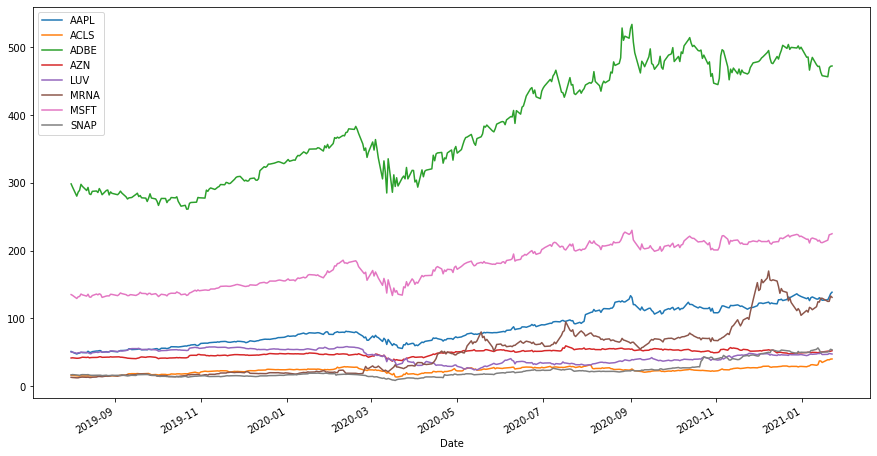

In [2]:

#newplot = tdata.plot(y = 'Adj Close', figsize = (15,8))

theData = tdata['Adj Close']

closeFrame = pd.DataFrame(theData)

newPlot = closeFrame.plot(figsize = (15,8))


currentClose = list(closeFrame.head(1))

deltalist = []
c = 0
for i in currentClose:
    for j in range(len(closeFrame[i])):
        if j == 0:
            deltalist.append( closeFrame[i].iloc[j] )
        if j == len(closeFrame[i])-1:
            deltalist[c] = closeFrame[i].iloc[j] - deltalist[c]
            c+=1


[87.47871780395508, 23.93000030517578, 174.0, 10.702152252197266, -3.0300369262695312, 118.0100040435791, 89.83755493164062, 36.88999938964844]


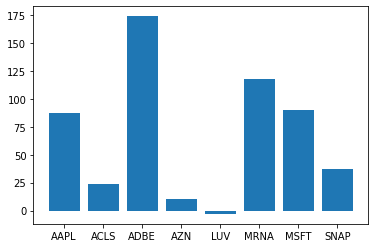

In [3]:
print(deltalist)

deltaPlot = plt.bar(height = deltalist, x = currentClose)

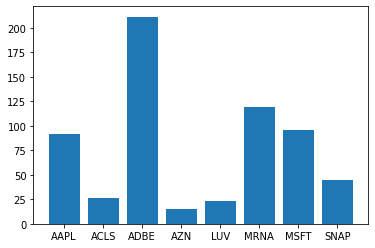

In [4]:
greatestlist = []
leastlist = []

c = 0
            
for i in currentClose:
    
    leastlist.append(closeFrame[i].iloc[0])
    greatestlist.append(closeFrame[i].iloc[0])
    
    for j in range(1, len(closeFrame[i])):
        if closeFrame[i].iloc[j] < leastlist[c]:
            leastlist.pop(c)
            leastlist.append(closeFrame[i].iloc[j])
        elif closeFrame[i].iloc[j] > leastlist[c]:
            greatestlist.pop(c)
            greatestlist.append(closeFrame[i].iloc[j])
    
    c += 1
            

difflist = []

for i in range(len(leastlist)):
    difflist.append(greatestlist[i] - leastlist[i])

diffPlot = plt.bar(height = difflist, x = currentClose)

In [27]:
from datetime import time

now = datetime.now()
marketOpen = datetime(now.year, now.month,now.day, 8, 30)

delta = timedelta(days=-1)

class Set_Interface():
    
    def __init__(self, stock):
        self.stock = stock
        dataframe = typeStock(stock)
        
    
    def typeStock(stock):
        if stock.info['quoteType'] == 'CRYPTOCURRENCY':
            return stock.history(period='1w', interval ='1m', start=now+delta, end=now)
        elif stock.info['quoteType'] == 'EQUITY':
            return stock.history(period='1w', interval ='1m', start=marketOpen, end=now)

    def formatGraph(dataframe):
        dataframe = typeStock(stock)
    
    


{'companyOfficers': [], 'name': 'Bitcoin', 'startDate': 1367107200, 'description': 'Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,751,800. The last known price of Bitcoin is 32,956.8434224 USD and is up 0.85 over the last 24 hours. It is currently trading on 9030 active market(s) with $25,228,880,204.99 traded over the last 24 hours. More information can be found at https://bitcoin.org/.', 'maxAge': 1, 'exchange': 'CCC', 'shortName': 'Bitcoin USD', 'exchangeTimezoneName': 'Europe/London', 'exchangeTimezoneShortName': 'BST', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'CRYPTOCURRENCY', 'symbol': 'BTC-USD', 'messageBoardId': 'finmb_BTC_CCC', 'market': 'ccc_market', 'previousClose': 39417.004, 'regularMarketOpen': 39417.004, 'twoHundredDayAverage': 44676.543, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': 37373665280, 'regularMarketDayHigh': 40809.9

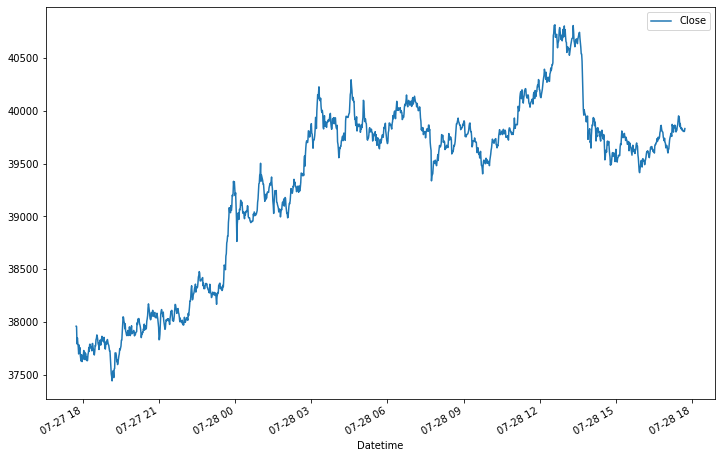

In [32]:
btc = yf.Ticker('BTC-USD')

print(btc.info)

cryptoData = typeStock(btc)

#crypto.history(period='1w', interval ='1m', start=now+delta, end=now)

cryptoClosePlot = cryptoData.plot(y = 'Close', figsize = (12,8))
#cryptoVolPlot = cryptoData.plot(y = 'Volume', figsize = (12,8))

In [37]:
tesla = yf.Ticker('TSLA')

print(tesla.ticker)

teslaData = typeStock(tesla)

newtesla = teslaData.reset_index()
newtesla.head()

for i in ['Open', 'High', 'Close', 'Low']: 
      newtesla[i]  =  newtesla[i].astype('float64')
        
teslafig = go.Figure(data=[go.Candlestick(x=newtesla['Datetime'], open=newtesla['Open'],high=newtesla['High'],low=newtesla['Low'], close=newtesla['Close'])])
teslafig.show()

newcrypto = cryptoData.reset_index()
newcrypto.head()

for i in ['Open', 'High', 'Close', 'Low']: 
      newcrypto[i]  =  newcrypto[i].astype('float64')
        
bitcoinfig = go.Figure(data=[go.Candlestick(x=newcrypto['Datetime'], open=newcrypto['Open'],high=newcrypto['High'],low=newcrypto['Low'], close=newcrypto['Close'])], )
bitcoinfig.show()


TSLA


In [ ]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    
    return rsi

rsiList = []

computeRSI(teslaData['Close'], 14)

array = np.array( computeRSI(teslaData['Close'], 14) )

import dash
import dash_core_components as dcc
import dash_html_components as html
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

def forSite(figure,xAxis,yAxis='Price (USD)'):
    figure.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
    )
    figure.update_xaxes(title_text=xAxis)
    figure.update_yaxes(title_text=yAxis)
    

#bitcoinfig.update_layout(
   # plot_bgcolor=colors['background'],
   # paper_bgcolor=colors['background'],
    #font_color=colors['text']
#)

#bitcoinfig.update_xaxes(title_text="BTC-USD")
#bitcoinfig.update_yaxes(title_text="Price (USD)")



In [ ]:
forSite(bitcoinfig,'BTC-USD','Price (USD)')
forSite(teslafig,'TSLA','Price (USD)')

In [ ]:
#app = dash.Dash(external_stylesheets=external_stylesheets)
#app.layout = html.Div(style={'backgroundColor': colors['background']},children=[
    
    #html.H1(children='Duende', style={
          #  'textAlign': 'center',
           # 'color': colors['text']
       # }),

   # html.Div(children='''
    #    The Signal in the Noise
    #''', style={
    #        'textAlign': 'center',
     #       'color': colors['text']
      #  }),
    
   # dcc.Graph(id='BTC-USD',figure=bitcoinfig,style={
   #         'color': colors['background']
    #    }),
    #
    #dcc.Graph(id='TSLA',figure=teslafig,style={
    #        'color': colors['background']
    #    }),
#])



#app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

